In [19]:
# Normal Equation
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [20]:
# compute theta using Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [21]:
# Function we used: y = 4 + 3x1 + Gaussian Noise
theta_best

array([[3.99176117],
       [3.02771796]])

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99176117],
       [10.0471971 ]])

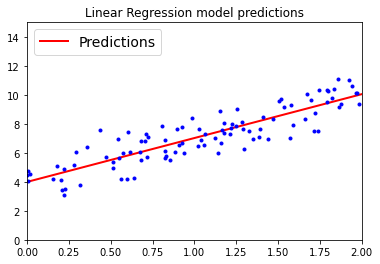

In [23]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("Linear Regression model predictions")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.99176117],
       [10.0471971 ]])

In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.99176117],
       [3.02771796]])

In [26]:
np.linalg.pinv(X_b).dot(y)

array([[3.99176117],
       [3.02771796]])

In [27]:
# Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradiants = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradiants
theta

array([[3.99176117],
       [3.02771796]])

In [28]:
# Stochastic Gradient Descent
n_epochs = 10
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradiants = 2 * xi.T.dot(xi.dot(theta))
        eta = learning_schedule(epoch*m + i)
        theta -= eta*gradiants

theta

array([[-0.00659264],
       [ 0.00542043]])

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97267582]), array([3.045797]))

In [31]:
# Polynomial Regression
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + np.random. randn(m, 1)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-3.95210479]), array([-3.95210479, 15.61913227]))

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.07224512]), array([[-0.01867227,  0.49760808]]))

In [34]:
# Learning Curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


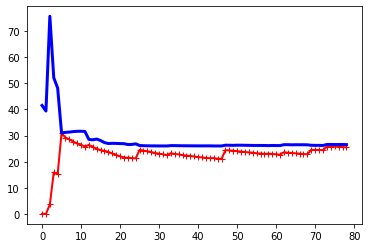

In [35]:
plot_learning_curves(lin_reg, X, y)

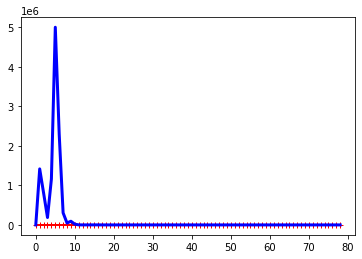

In [36]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)